In [1]:
import pandas
import matplotlib.pyplot as plt

In [2]:
columns = ["HITId","HITTypeId","Title","Description","Keywords","Reward","CreationTime","MaxAssignments","RequesterAnnotation","AssignmentDurationInSeconds","AutoApprovalDelayInSeconds","Expiration","NumberOfSimilarHITs","LifetimeInSeconds","AssignmentId","WorkerId","AssignmentStatus","AcceptTime","SubmitTime","AutoApprovalTime","ApprovalTime","RejectionTime","RequesterFeedback","WorkTimeInSeconds","LifetimeApprovalRate","Last30DaysApprovalRate","Last7DaysApprovalRate","Input.corpus_id","Input.file_id","Input.token_id","Input.sentence","Input.token","Input.begin","Input.end","Answer.sentiment.label","Approve","Reject"]
df = pandas.read_csv("LCP_2021/batchResults/all.csv",names=columns)

/var/folders/2d/gn3x71d92c57d2j0wpbr_3_00000gs/T/ipykernel_70231/595440524.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pandas.read_csv("LCP_2021/batchResults/all.csv",names=columns)


In [3]:
# change mapping here to replicate lower order label sets 
df['Answer.sentiment.label'] = df['Answer.sentiment.label'].map({'Very Easy':0,'Easy':1,'Neutral':2,'Difficult':3,'Very Difficult':4})

In [4]:
groups = df.groupby('HITId')

In [5]:
dfs = []
pandas.DataFrame(columns=['token', 'annotations', 'complexity', 'subjectivity'])
for group in groups:
    token = group[1]['Input.token'].to_list()[0]
    annotations = group[1]['Answer.sentiment.label'].to_list()
    complexity = sum(annotations)/len(annotations)
    subjectivity = sum([abs(complexity - annotation) for annotation in annotations]) / len(annotations)
    dfs.append(pandas.DataFrame({'token':token,'anno_count':len(annotations),'complexity':complexity,'subjectivity':subjectivity}, index=[0]))

df = pandas.concat(dfs,ignore_index=True)

array([[<AxesSubplot:title={'center':'complexity'}>]], dtype=object)

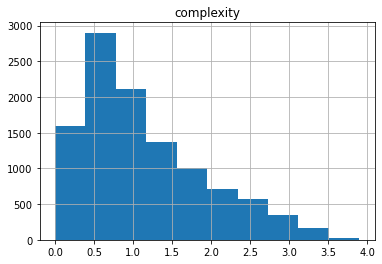

In [6]:
df.hist('complexity')

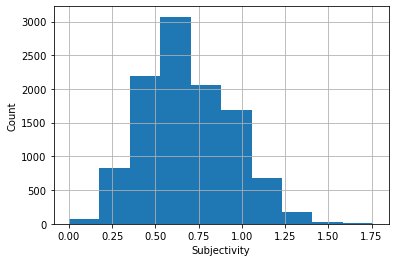

In [7]:
plot = df.subjectivity.hist()
plot.set_xlabel('Subjectivity')
plot.set_ylabel('Count')
plot.figure.savefig("Figures/LCP_2021_Hist.pdf")

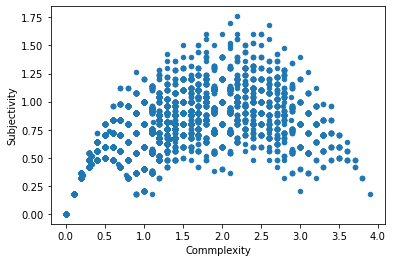

In [8]:
plot = df.plot.scatter(x='complexity',y='subjectivity')
plot.set_xlabel('Commplexity')
plot.set_ylabel('Subjectivity')

plot.figure.savefig("Figures/LCP_2021_Scatter.pdf")

In [9]:
alpha = 0.025
L = 5
N = 10
T_subj = alpha * L * N
print(T_subj)

1.25


In [10]:
alphas = [] 
xs = []
ys = []
for alpha in range(0,250):
    alpha /= 10000
    T_subj = alpha * L * N
    y = sum(df.subjectivity > T_subj)/len(df.subjectivity)
    alphas.append(alpha)
    xs.append(T_subj)
    ys.append(y)

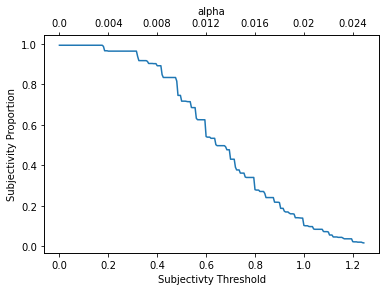

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()


ax1.plot(xs,ys)
ax1.set_xlabel('Subjectivty Threshold')
ax1.set_ylabel("Subjectivity Proportion")

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(     [0  ,0.2  ,0.4 ,0.6  ,0.8 ,1    ,1.2])
ax2.set_xticklabels([0.0,0.004,0.008,0.012,0.016,0.02,0.024])
ax2.set_xlabel("alpha")

plt.show()

fig.savefig("Figures/LCP_2021_Threshold.pdf")

In [12]:
df.to_pickle("lcp_2021.pkl")